In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats

%load_ext autoreload
%autoreload 2

from utils import (
    plot_main_effects, 
    plot_interaction_effects,
    create_reg_str,
    run_min_condition_validation
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load 2k Simulation Data

In [3]:
data = pd.read_csv('RESULTS_FineTune_1.csv')
data = data.rename(columns={col : col.replace('.','') for col in data.columns})
data.head()

,TileSize,MatchScore,PrevLength,PrevType,BrowseTime
0,0.2,70,79,TT,10.318581
1,0.2,70,69,TT,11.443339
2,0.2,80,79,TT,11.606591
3,0.2,80,69,TT,12.016413
4,0.2,75,74,TT,10.686058


# Plot the main effects plot

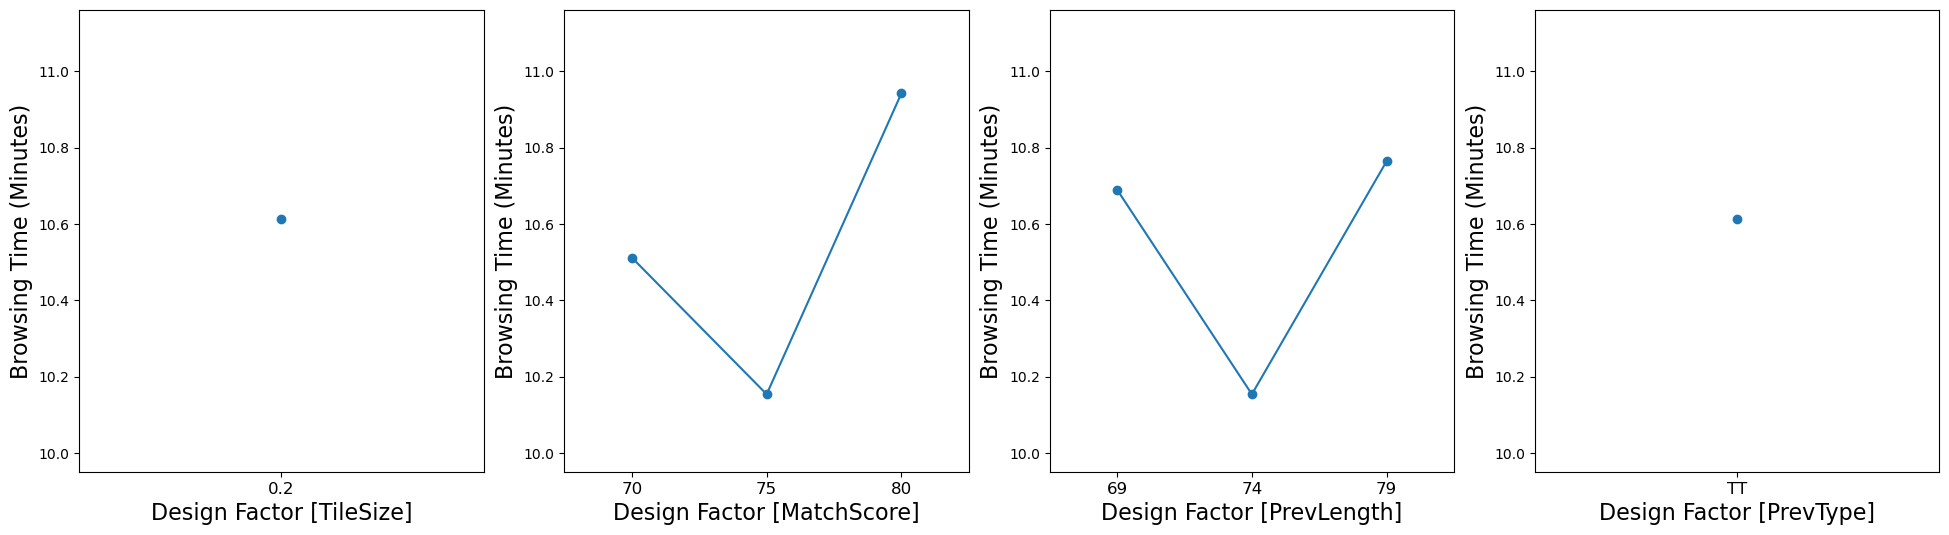

In [3]:
cols = ['TileSize', 'MatchScore', 'PrevLength', 'PrevType']
target = 'BrowseTime'

moi = "Browsing Time (Minutes)"

plot_main_effects(data, cols, target, moi)

# Plot the interactions plots

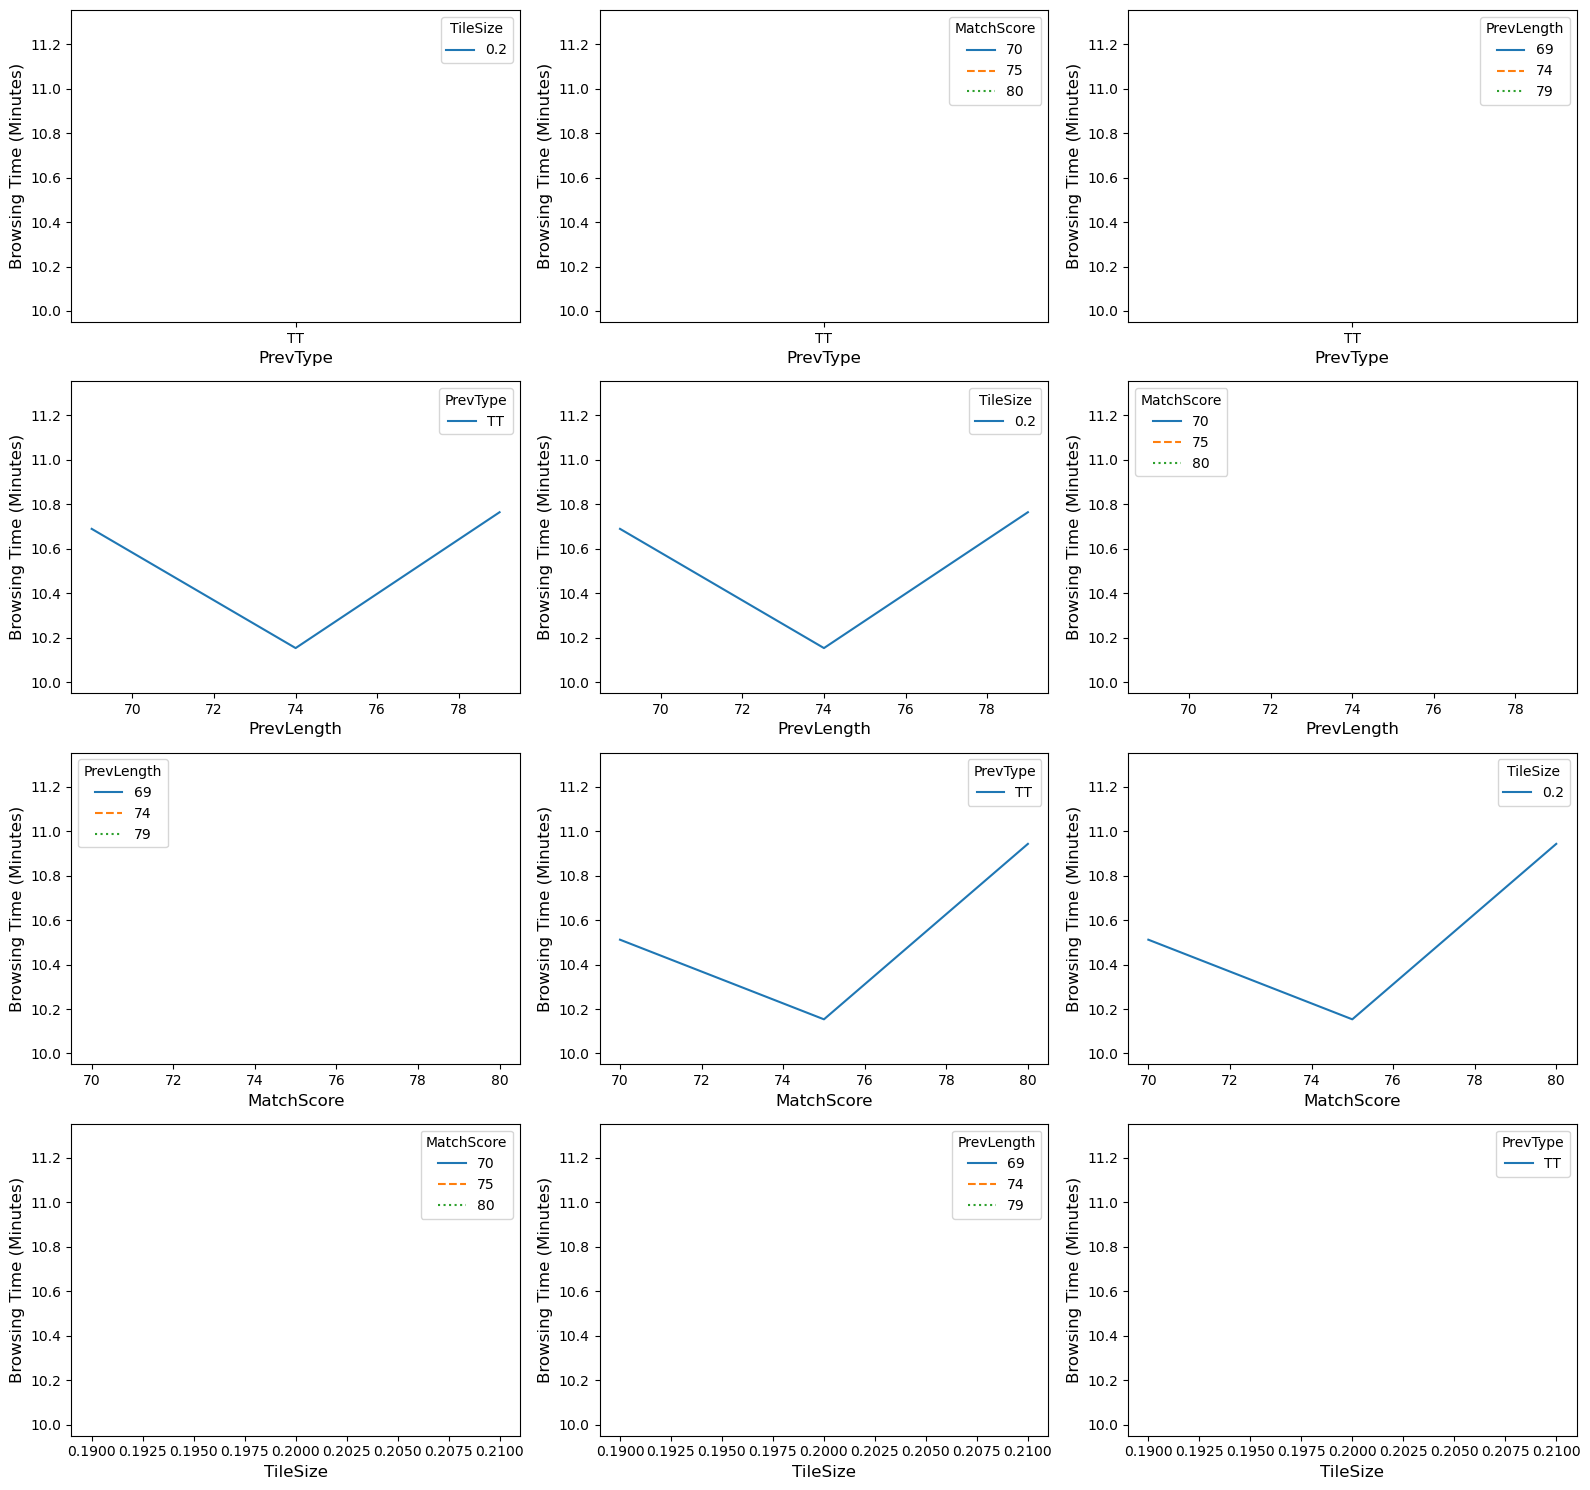

In [4]:
cols = ['TileSize', 'MatchScore', 'PrevLength', 'PrevType']
target = 'BrowseTime'

moi = "Browsing Time (Minutes)"

plot_interaction_effects(data, cols, target, moi)

# Fit full model to check p-values

In [5]:
cols = ['TileSize', 'MatchScore', 'PrevLength', 'PrevType']
target = 'BrowseTime'

full_model_str = create_reg_str(cols, target, interactions=True)

print(f"{full_model_str = }")

smf.ols(full_model_str, data=data).fit().summary()

full_model_str = 'BrowseTime ~ C(TileSize) * C(MatchScore) * C(PrevLength) * C(PrevType)'


/Users/bharadwajyadavallu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BrowseTime   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     9.825
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           5.75e-09
Time:                        17:26:53   Log-Likelihood:                -695.17
No. Observations:                 500   AIC:                             1402.
Df Residuals:                     494   BIC:                             1428.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  10.5989      0.103    102.732      0.000      10.396      10.802
C(MatchScore)[T.75]                      8.386e+12   1.04e+13      0.804      0.422   -1.21e+13    2.89e+13
C(MatchScore)[T.80]                         0.1387      0.139      0.999      0.318      -0.134       0.411
C(PrevLength)[T.74]                     -1.004e+13   1.25e+13     -0.804      0.422   -3.46e+13    1.45e+13
C(PrevLength)[T.79]                        -0.2168      0.139     -1.561      0.119      -0.490       0.056
C(MatchScore)[T.75]:C(PrevLength)[T.74]  1.651e+12   2.05e+12      0.804      0.422   -2.39e+12    5.69e+12
C(MatchScore)[T.80]:C(PrevLength)[T.74]          0          0        nan        nan           0           0
C(MatchScore)[T.75]:C(PrevLength)[T.79]          0          0        nan        nan           0           0
C(MatchScore)[T.80]:C(PrevLength)[T.79]     0.5946      0.196      3.036      0.003       0.210       0.979
==============================================================================
Omnibus:                        1.512   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                1.589
Skew:                           0.127   Prob(JB):                        0.452
Kurtosis:                       2.892   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Check if interaction terms are negligable

In [6]:
cols = ['TileSize', 'MatchScore', 'PrevLength', 'PrevType']
target = 'BrowseTime'

full_model_str = create_reg_str(cols, target, interactions=True)
reduced_model_str = create_reg_str(cols, target, interactions=False)

print(f"{full_model_str = }")
print(f"{reduced_model_str = }")

full_model = smf.ols(full_model_str, data=data).fit()
reduced_model = smf.ols(reduced_model_str, data=data).fit()

sm.stats.anova_lm(reduced_model, full_model)

full_model_str = 'BrowseTime ~ C(TileSize) * C(MatchScore) * C(PrevLength) * C(PrevType)'
reduced_model_str = 'BrowseTime ~ C(TileSize) + C(MatchScore) + C(PrevLength) + C(PrevType)'


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,496.0,473.699956,0.0,NaN,NaN,NaN
1,494.0,472.208995,2.0,1.490961,0.779882,0.459024


# Check if the Tile Size is important on browse time

In [7]:
cols = ['TileSize', 'MatchScore', 'PrevLength', 'PrevType']
target = 'BrowseTime'

full_model_str = create_reg_str(cols, target, interactions=True)
reduced_model_str = create_reg_str(cols[1:], target, interactions=True)

print(f"{full_model_str = }")
print(f"{reduced_model_str = }")

full_model = smf.ols(full_model_str, data=data).fit()
reduced_model = smf.ols(reduced_model_str, data=data).fit()

sm.stats.anova_lm(reduced_model, full_model)

full_model_str = 'BrowseTime ~ C(TileSize) * C(MatchScore) * C(PrevLength) * C(PrevType)'
reduced_model_str = 'BrowseTime ~ C(MatchScore) * C(PrevLength) * C(PrevType)'


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,494.0,472.208995,0.0,NaN,NaN,NaN
1,494.0,472.208995,-0.0,-0.0,NaN,NaN


# Check if Match Score is important

In [8]:
cols = ['MatchScore', 'PrevLength', 'PrevType']
target = 'BrowseTime'

full_model_str = create_reg_str(cols, target, interactions=True)
reduced_model_str = create_reg_str(cols[1:], target, interactions=True)

print(f"{full_model_str = }")
print(f"{reduced_model_str = }")

full_model = smf.ols(full_model_str, data=data).fit()
reduced_model = smf.ols(reduced_model_str, data=data).fit()

sm.stats.anova_lm(reduced_model, full_model)

full_model_str = 'BrowseTime ~ C(MatchScore) * C(PrevLength) * C(PrevType)'
reduced_model_str = 'BrowseTime ~ C(PrevLength) * C(PrevType)'


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,497.0,492.278822,0.0,NaN,NaN,NaN
1,494.0,472.208995,3.0,20.069827,6.998663,0.000129


# Check if Preview Length is important

In [9]:
cols = ['PrevLength', 'MatchScore', 'PrevType']
target = 'BrowseTime'

full_model_str = create_reg_str(cols, target, interactions=True)
reduced_model_str = create_reg_str(cols[1:], target, interactions=True)

print(f"{full_model_str = }")
print(f"{reduced_model_str = }")

full_model = smf.ols(full_model_str, data=data).fit()
reduced_model = smf.ols(reduced_model_str, data=data).fit()

sm.stats.anova_lm(reduced_model, full_model)

full_model_str = 'BrowseTime ~ C(PrevLength) * C(MatchScore) * C(PrevType)'
reduced_model_str = 'BrowseTime ~ C(MatchScore) * C(PrevType)'


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,497.0,474.259827,0.0,NaN,NaN,NaN
1,494.0,467.025559,3.0,7.234268,2.550701,0.055017


# Check if Preview Type is important

In [10]:
cols = ['PrevType', 'PrevLength', 'MatchScore']
target = 'BrowseTime'

full_model_str = create_reg_str(cols, target, interactions=True)
reduced_model_str = create_reg_str(cols[1:], target, interactions=True)

print(f"{full_model_str = }")
print(f"{reduced_model_str = }")

full_model = smf.ols(full_model_str, data=data).fit()
reduced_model = smf.ols(reduced_model_str, data=data).fit()

sm.stats.anova_lm(reduced_model, full_model)

full_model_str = 'BrowseTime ~ C(PrevType) * C(PrevLength) * C(MatchScore)'
reduced_model_str = 'BrowseTime ~ C(PrevLength) * C(MatchScore)'


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,494.0,467.025559,0.0,NaN,NaN,NaN
1,494.0,467.025559,-0.0,-0.0,NaN,NaN


# Find conditions that minimise browsing times

In [12]:
cols = ['PrevType', 'PrevLength', 'MatchScore']
target = 'BrowseTime'

grouped = data.groupby(cols)[[target]].mean().sort_values(target)
grouped

BrowseTime
PrevType PrevLength MatchScore            
TT       74         75           10.153670
         79         70           10.398312
         69         70           10.625360
                    80           10.754520
         79         80           11.131217

# Perform pairwise analysis to see if lowest browse time actually lowest

In [13]:
cols = ['PrevType', 'PrevLength', 'MatchScore']
target = 'BrowseTime'

run_min_condition_validation(data, cols, target)

Info:	[Condition, [PrevType: TT] [PrevLength: 74] [MatchScore: 75], [PrevType: TT] [PrevLength: 79] [MatchScore: 70], less]
Variance F-test p-value = 0.6497397624660626
Used Student's t-test to compute p-value

Info:	[Condition, [PrevType: TT] [PrevLength: 74] [MatchScore: 75], [PrevType: TT] [PrevLength: 69] [MatchScore: 70], less]
Variance F-test p-value = 0.5199291236812571
Used Student's t-test to compute p-value

Info:	[Condition, [PrevType: TT] [PrevLength: 74] [MatchScore: 75], [PrevType: TT] [PrevLength: 69] [MatchScore: 80], less]
Variance F-test p-value = 0.3631109572143524
Used Student's t-test to compute p-value

Info:	[Condition, [PrevType: TT] [PrevLength: 74] [MatchScore: 75], [PrevType: TT] [PrevLength: 79] [MatchScore: 80], less]
Variance F-test p-value = 0.6441436593806746
Used Student's t-test to compute p-value



,Column,Value 1,Value 2,Alternate,t-stat,p-value,p* [Bonferroni],p* [Sidak],p* [Holm]
0,Condition,[PrevType: TT] [PrevLength: 74] [MatchScore: 75],[PrevType: TT] [PrevLength: 79] [MatchScore: 70],less,-1.694779,4.584472e-02,1.833789e-01,1.711494e-01,4.584472e-02
1,Condition,[PrevType: TT] [PrevLength: 74] [MatchScore: 75],[PrevType: TT] [PrevLength: 69] [MatchScore: 70],less,-3.450736,3.416304e-04,1.366522e-03,1.365822e-03,6.832609e-04
2,Condition,[PrevType: TT] [PrevLength: 74] [MatchScore: 75],[PrevType: TT] [PrevLength: 69] [MatchScore: 80],less,-4.450094,7.155471e-06,2.862188e-05,2.862158e-05,2.146641e-05
3,Condition,[PrevType: TT] [PrevLength: 74] [MatchScore: 75],[PrevType: TT] [PrevLength: 79] [MatchScore: 80],less,-7.090164,1.155965e-11,4.623861e-11,4.623857e-11,4.623861e-11


In [14]:
data.groupby(cols)[[target]].mean().sort_values(target)

BrowseTime
PrevType PrevLength MatchScore            
TT       74         75           10.153670
         79         70           10.398312
         69         70           10.625360
                    80           10.754520
         79         80           11.131217